## Pracuj and Careerjet one day 'python scraping' visualizations

In [1]:
import pandas as pd
from datetime import datetime, date
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import math
import numpy as np

In [28]:
path = r'./scraping_results/'
df = pd.read_csv(path + 'careerjet_pracuj_python_2023-11-25.csv', index_col=0)
df.sample(5)

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
333,Automation Test Engineer,https://www.pracuj.pl/praca/automation-test-en...,NaN,NaN,12 000–19 000 zł netto (+ VAT) / mies.,NaN,NaN,"['Cypress', 'Selenium', 'SQL', 'Python']",python,2023-11-25
170,Backend Engineer,https://www.pracuj.pl/praca/backend-engineer-k...,NaN,NaN,12 400–25 900 zł netto (+ VAT) / mies.,NaN,NaN,"['Ruby on Rails', 'Python', 'Kubernetes', 'AWS...",python,2023-11-25
196,Software Engineer II - Google Cloud,https://www.pracuj.pl/praca/software-engineer-...,NaN,NaN,NaN,NaN,NaN,"['Python', 'C', 'C++', 'Java', 'JavaScript']",python,2023-11-25
64,Cybersecurity Senior Consultant (Senior Pentes...,careerjet.pl/jobad/pl4a864ba1b986fbb17be8d6d53...,EY,"Wrocław, dolnośląskie",NaN,Senior Pentester Let us introduce you the jo...,NaN,NaN,python,2023-11-25
67,Senior machine learning developer - praca zdalna,careerjet.pl/jobad/pl0734f25d52aa7c0fcc723fc35...,HRlink,"Opole, opolskie",NaN,HRlink jest firmą technologiczną z branży IT. ...,NaN,NaN,python,2023-11-25


### Check the count of null values in each Column

In [3]:
null_count = df.isna().sum()
null_count = pd.DataFrame(null_count)
null_count = null_count.T
null_count

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
0,37,37,284,250,244,91,350,100,0,0


### Analyzing the skills required

In [4]:
skills = df['skills']

#### Drop null values

In [5]:
skills_clean = skills.dropna()

In [6]:
len(skills_clean)

250

In [7]:
skills_clean = pd.DataFrame(skills_clean, columns=['skills'])
skills_clean = skills_clean.reset_index(drop=True)
skills_clean.head()

,skills
0,"['Python', 'Apache Camel', 'DB', 'Java']"
1,"['Python', 'CI/CD', 'Apache Camel', 'DB', 'Jav..."
2,"['ETL', 'Python', 'SQL', 'AWS', 'PostgreSQL']"
3,"['C++', 'C#', 'Python', 'Git', 'Visual Studio']"
4,"['SQL', 'Node.js', 'Python', 'Git', 'Looker']"


In [8]:
# skills_split = skills_clean.skills.apply(pd.Series)
# skills_split[['skill1','skill2', 'rest']] = pd.DataFrame(skills_clean.skills.tolist())
# skills_split = pd.DataFrame(skills_clean.skills.tolist())
# print(skills_split.head())
# skills_split.rename(columns={0:'skill1', 1:'skill2',
#                                2:'skill3', 3:'skill4',
#                                4:'skill5', 5:'skill6'}, inplace=True)
# skills_split.head()
skills_string = skills_clean['skills'].str.split(',', expand=True)
# skills_string.apply(lambda x: re.sub('[a-zA-Z]+', '', x))
# skills_string = skills_string.replace(r'([a-zA-Z]*)', r'\1', regex=True)
skills_string = skills_string.replace(r'\[', r'', regex=True)
skills_string = skills_string.replace(r'\]', r'', regex=True)
skills_string = skills_string.replace(r"'", r'', regex=True)
skills_string.drop
skills_string.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Python,Apache Camel,DB,Java,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,ETL,Python,SQL,AWS,PostgreSQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C++,C#,Python,Git,Visual Studio,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SQL,Node.js,Python,Git,Looker,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### Split column cells into separate cells of strings

In [9]:
skills_string = skills_string.loc[:, :6]
skills_string.fillna("", inplace=True)
skills_string.head()

,0,1,2,3,4,5,6
0,Python,Apache Camel,DB,Java,,,
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins
2,ETL,Python,SQL,AWS,PostgreSQL,,
3,C++,C#,Python,Git,Visual Studio,,
4,SQL,Node.js,Python,Git,Looker,,


### Get word count of skills by combining them into a single string (not an array) and using the wordcloud library

Text(0.5, 1.0, 'Skills word cloud [python]')

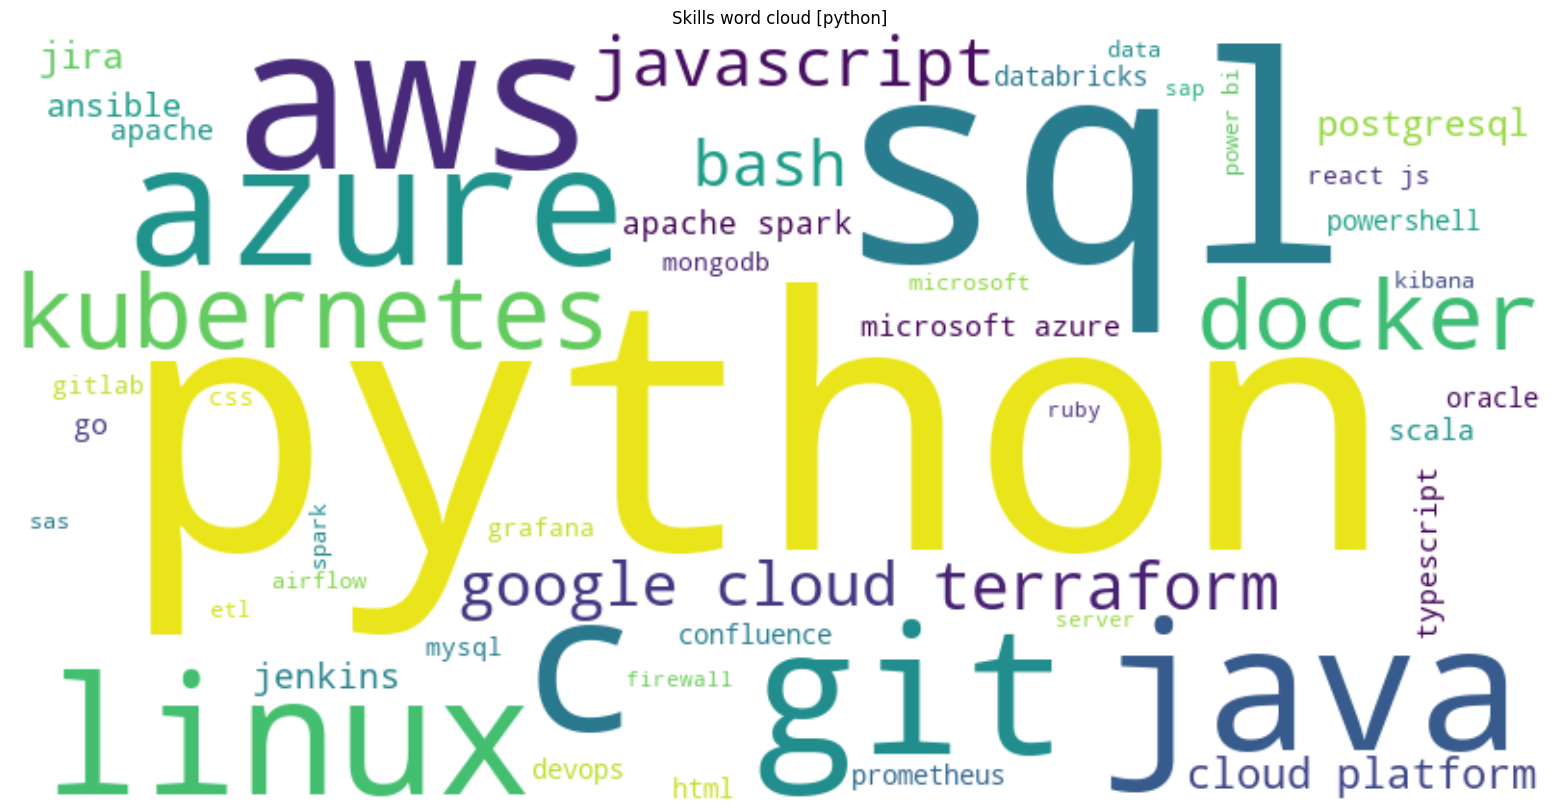

In [10]:
# skills_string['joined'] = skills_string[[0,1,2,3,4,5,6]].agg(', '.join, axis=1)
sum_string = ''
for column in skills_string.columns:
    sum_string += ' '.join(skills_string[column].str.lower())
# skills_string[0]
# skills_string.columns[0]
# skills_string[skills_string.columns[0]]
plt.figure(figsize=(20,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
              width=800, height=400)
wc.generate(sum_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skills word cloud [python]')

Text(0.5, 1.0, 'skills frequency bar chart')

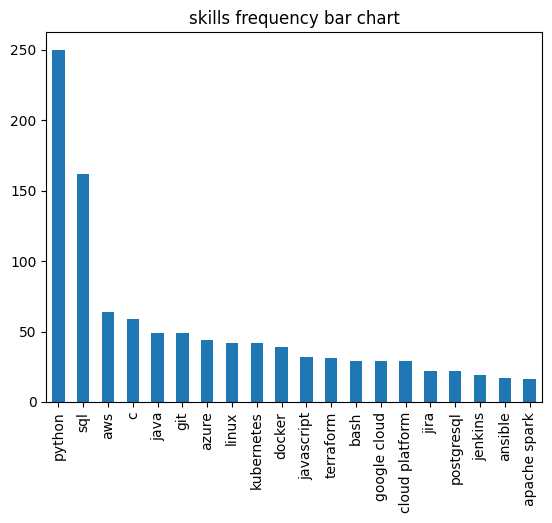

In [11]:
# freq_count_0 =  
# for col in skills_string.columns:
#     freq_count = skills_string[col].values_count()
# words_fc = pd.DataFrame(wc.words_)
words_fc = pd.Series(wc.words_)
words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:20].plot.bar()
plt.title('skills frequency bar chart')

Text(0.5, 1.0, 'skills frequency pie chart')

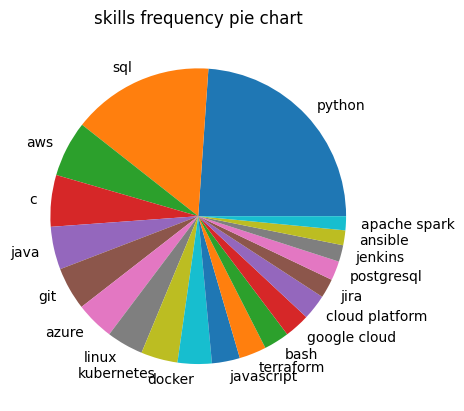

In [12]:
words_fc[:20].plot.pie()
plt.title('skills frequency pie chart')

In [13]:
help(wc)

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defau

### Analyzing the job titles

Text(0.5, 1.0, 'Title word cloud')

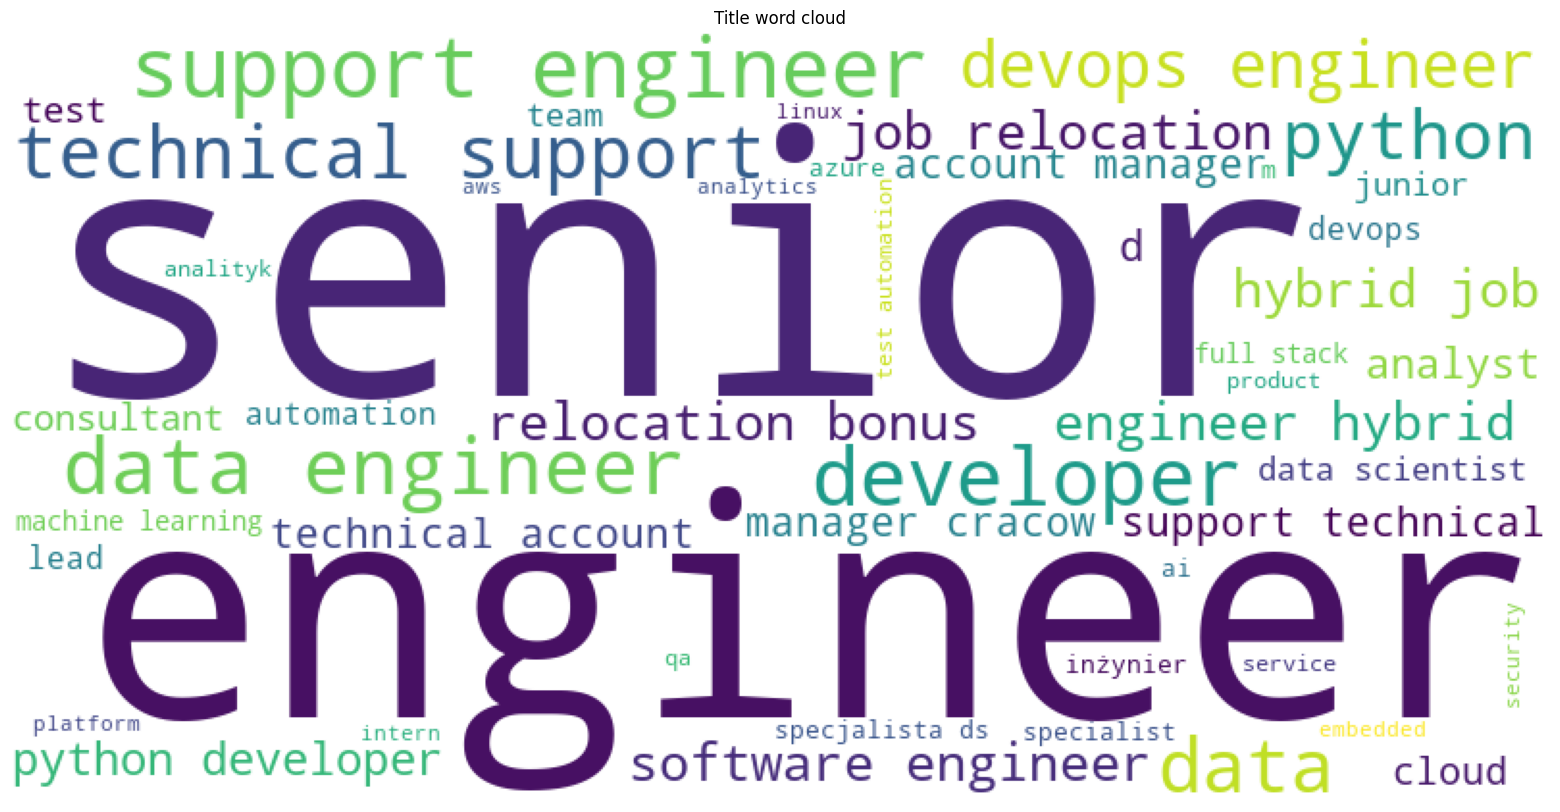

In [14]:
title_clean = df['title'].dropna()
len(title_clean)
title_string = ' '.join(title_clean.str.lower())
plt.figure(figsize=(20,10))
wc_title = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_title.generate(title_string)
plt.imshow(wc_title)
plt.axis('off')
plt.title('Title word cloud')

<Axes: >

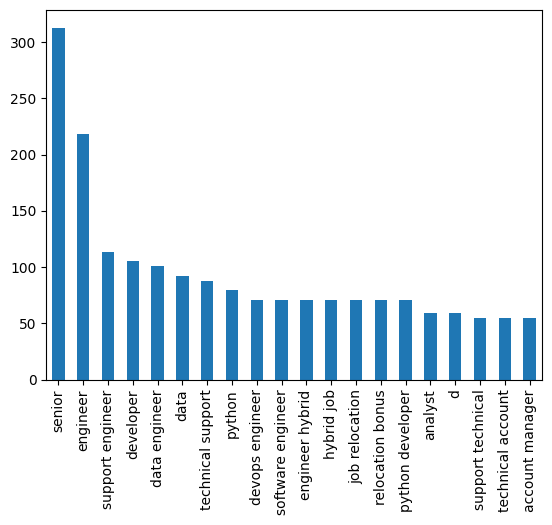

In [15]:
title_fc = pd.Series(wc_title.words_)
title_fc = np.ceil(title_fc * len(title_clean))
title_fc[:20].plot.bar()

### Companies

In [16]:
companies = df['company'].value_counts()
unique_companies = df['company'].unique()
print(companies.head(10))
print(len(unique_companies))

company
Luxoft                                         10
Allegro                                         3
Accenture Intelligent Consulting Hub Europe     3
Dolby                                           3
Scalo                                           3
Verkada                                         3
HRlink                                          3
Santander                                       2
GlobalLogic                                     2
OLX Group                                       2
Name: count, dtype: int64
41


<Axes: ylabel='count'>

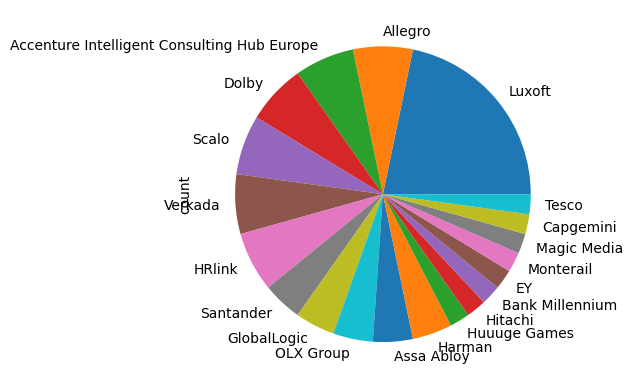

In [17]:
companies[:20].plot.pie()

### Description

259


Text(0.5, 1.0, 'Desc word cloud')

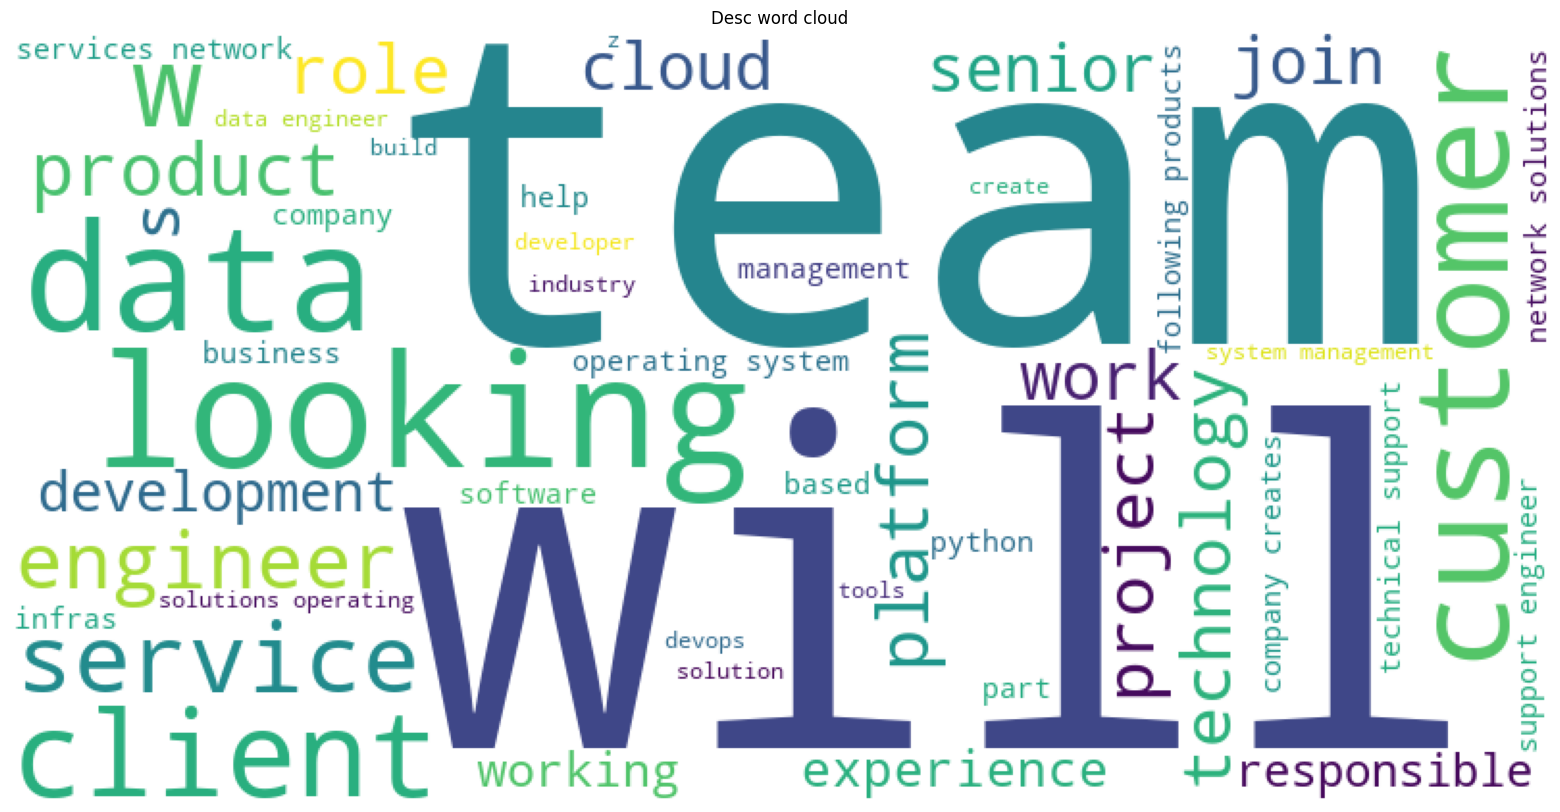

In [18]:
desc_clean = df['description'].dropna()
print(len(desc_clean))
desc_string = ' '.join(desc_clean.str.lower())
plt.figure(figsize=(20,10))
wc_desc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_desc.generate(desc_string)
plt.imshow(wc_desc)
plt.axis('off')
plt.title('Desc word cloud')

### Date?

In [19]:
date_clean = df['date_added'].dropna()
print(len(date_clean))

0


### Location

In [20]:
location_clean = df['location'].dropna()
len(location_clean)

100

In [21]:
location_clean.sample(10)

13                   Polska
29    Wrocław, dolnośląskie
97    Poznań, wielkopolskie
24      Kraków, małopolskie
78      Kraków, małopolskie
98           świętokrzyskie
86      Kraków, małopolskie
14    Warszawa, mazowieckie
12    Warszawa, mazowieckie
59      Kraków, małopolskie
Name: location, dtype: object

In [22]:
len(location_clean.unique())

19

In [23]:
location_clean.value_counts()

location
Kraków, małopolskie              34
Polska                           16
Warszawa, mazowieckie            15
Wrocław, dolnośląskie            11
Lublin, lubelskie                 4
Zabierzów, małopolskie            2
Opole, opolskie                   2
Łódź, łódzkie                     2
Bydgoszcz, kujawsko-pomorskie     2
Katowice, śląskie                 2
Poznań, wielkopolskie             2
Rzeszów, podkarpackie             1
Szczecin, zachodniopomorskie      1
Gdańsk, pomorskie                 1
mazowieckie                       1
lubelskie                         1
Gorzów Wielkopolski, lubuskie     1
dolnośląskie                      1
świętokrzyskie                    1
Name: count, dtype: int64

<Axes: ylabel='count'>

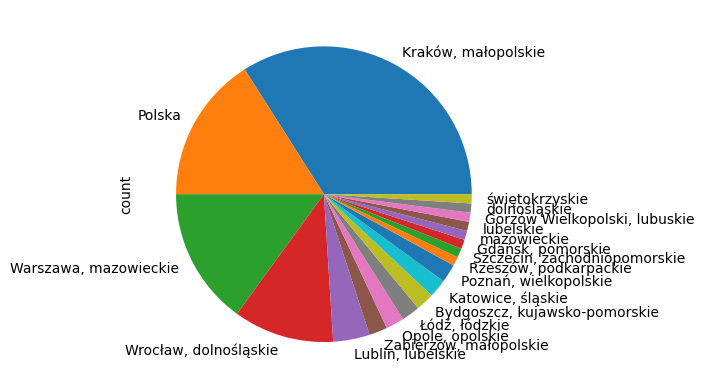

In [24]:
location_clean.value_counts().plot.pie()

### Salary?

In [25]:
salary_clean = df['salary'].dropna()
len(salary_clean)

106

In [26]:
len(salary_clean.unique())

95